In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import seaborn as sns

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

### Import data

In [2]:
df = pd.read_excel('DatasetEN.xlsx',index_col=0) #load data
print(df.shape)
df

(49028, 22)


,Status,Target date,Closed,Category,Subcategory,Call Type,Department,Call Date,Number of days current,Department.1,...,Time spent for Second Line,Date/time of creation,Date/time of change,Closure Date,Completion Date,Duration,Actual duration,Escalated,Major call,Entry
Line,,,,,,,,,,,,,,,,,,,,,
Second line call,Onterecht aangemaakt,2015-01-23 10:54:00,True,ICT SAP,SD (Verkoop),ICT Verstoring,NaN,2013-11-22 08:54:00,288,Klantenservice - Klantenservice-A - K&O,...,00:00:00,2013-11-22 08:54:34,2015-01-15 13:14:12,2015-01-15 13:14:00,2015-01-15 13:14:00,2 uur,1900-05-22 09:20:00,True,NaN,E-mail
Second line call,Afgehandeld,2015-09-18 11:52:00,True,ICT GIS,Smallworld NRM,ICT Verstoring,NaN,2014-06-04 11:52:00,322,Aanleg Leidingen - Aansluitleidingen - K&O,...,00:00:00,2014-06-04 11:52:15,2015-09-10 12:52:18,2015-09-10 12:52:00,2015-09-10 12:52:00,5 dagen,1900-06-08 09:30:00,True,NaN,E-mail
Second line call,Afgehandeld,2016-12-30 18:00:00,True,ICT GIS,Arcgis,ICT Verstoring,NaN,2014-07-21 15:15:00,183,NaN,...,00:00:00,2014-07-21 15:21:58,2015-04-08 07:57:11,2015-04-08 07:57:00,2015-04-08 07:57:00,5 dagen,1900-03-31 01:12:00,True,NaN,Telefonisch
Second line call,Afgehandeld,2015-07-17 15:45:00,True,ICT Infra,Netwerkverbinding,ICT Verstoring,NaN,2014-10-09 15:45:00,169,Productie - Centraal - K&O,...,00:00:00,2014-10-09 15:45:51,2015-06-16 14:28:58,2015-06-16 14:28:00,2015-06-16 14:28:00,5 dagen,1900-03-24 07:13:00,True,NaN,E-mail
Second line call,Afgehandeld,2015-02-27 10:42:00,True,ICT Overige applicaties,Kijk op water,ICT Vraag,NaN,2014-10-20 10:42:00,75,Onderhoud & Inspectie - Inspectie & Kwal. - K&O,...,00:00:00,2014-10-20 10:42:31,2015-02-05 09:10:00,2015-02-05 09:09:00,2015-02-05 09:09:00,5 dagen,1900-02-06 06:57:00,True,NaN,E-mail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
First line call,Omgezet naar wijziging,2021-03-15 07:58:00,True,ICT GIS,Smallworld NRM,ICT Service Request,K&O - Aanleg leidingen - HAL,2021-03-12 15:58:00,0,Aanleg leidingen - K&O,...,00:00:00,2021-03-12 15:58:11,2021-03-12 16:24:37,2021-03-12 16:24:00,2021-03-12 16:24:00,4 uur,00:26:00,False,NaN,E-mail
First line call,Onterecht aangemaakt,2021-03-15 11:00:00,True,-,-,ICT Vraag,BO - ICT - ICT Service & Infra,2021-03-13 10:32:00,0,ICT - ICT Services & Infra - BO,...,00:00:00,2021-03-13 10:32:51,2021-03-13 14:13:56,2021-03-13 14:13:00,2021-03-13 14:13:00,4 uur,00:00:00,False,NaN,E-mail
First line call,Onterecht aangemaakt,2021-03-15 11:00:00,True,-,-,ICT Vraag,BO - ICT - ICT Service & Infra,2021-03-13 12:22:00,0,ICT - ICT Services & Infra - BO,...,00:00:00,2021-03-13 12:22:56,2021-03-13 14:14:02,2021-03-13 14:14:00,2021-03-13 14:14:00,4 uur,00:00:00,False,NaN,E-mail


In [3]:
df.keys()

Index(['Status', 'Target date', 'Closed', 'Category', 'Subcategory',
       'Call Type', 'Department', 'Call Date', 'Number of days current',
       'Department.1', 'Operator Group', 'Time spent for First line',
       'Time spent for Second Line', 'Date/time of creation',
       'Date/time of change', 'Closure Date', 'Completion Date', 'Duration',
       'Actual duration', 'Escalated', 'Major call', 'Entry'],
      dtype='object')

In [4]:
df.shape

(49028, 22)

## EDA

### Filter important columns

In [5]:
df = df[['Status', 'Target date','Category','Subcategory','Call Type','Department.1','Operator Group','Date/time of creation','Closure Date','Duration','Entry']]
df['Line'] = df.index
df.reset_index(drop=True)

df.head()

<ipython-input-5-1949ae73fe1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Line'] = df.index


,Status,Target date,Category,Subcategory,Call Type,Department.1,Operator Group,Date/time of creation,Closure Date,Duration,Entry,Line
Line,,,,,,,,,,,,
Second line call,Onterecht aangemaakt,2015-01-23 10:54:00,ICT SAP,SD (Verkoop),ICT Verstoring,Klantenservice - Klantenservice-A - K&O,ICT ServiceDesk,2013-11-22 08:54:34,2015-01-15 13:14:00,2 uur,E-mail,Second line call
Second line call,Afgehandeld,2015-09-18 11:52:00,ICT GIS,Smallworld NRM,ICT Verstoring,Aanleg Leidingen - Aansluitleidingen - K&O,ICT ServiceDesk,2014-06-04 11:52:15,2015-09-10 12:52:00,5 dagen,E-mail,Second line call
Second line call,Afgehandeld,2016-12-30 18:00:00,ICT GIS,Arcgis,ICT Verstoring,NaN,ICT Technisch beheer,2014-07-21 15:21:58,2015-04-08 07:57:00,5 dagen,Telefonisch,Second line call
Second line call,Afgehandeld,2015-07-17 15:45:00,ICT Infra,Netwerkverbinding,ICT Verstoring,Productie - Centraal - K&O,ICT Technisch beheer,2014-10-09 15:45:51,2015-06-16 14:28:00,5 dagen,E-mail,Second line call
Second line call,Afgehandeld,2015-02-27 10:42:00,ICT Overige applicaties,Kijk op water,ICT Vraag,Onderhoud & Inspectie - Inspectie & Kwal. - K&O,ICT Technisch beheer,2014-10-20 10:42:31,2015-02-05 09:09:00,5 dagen,E-mail,Second line call


In [6]:
df.shape

(49028, 12)

Create a column that represents the total duration of a call:

In [7]:
df['actual duration'] = df['Closure Date'] - df['Date/time of creation']

<ipython-input-7-b65e94e25e9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual duration'] = df['Closure Date'] - df['Date/time of creation']


In [8]:
df.head()

,Status,Target date,Category,Subcategory,Call Type,Department.1,Operator Group,Date/time of creation,Closure Date,Duration,Entry,Line,actual duration
Line,,,,,,,,,,,,,
Second line call,Onterecht aangemaakt,2015-01-23 10:54:00,ICT SAP,SD (Verkoop),ICT Verstoring,Klantenservice - Klantenservice-A - K&O,ICT ServiceDesk,2013-11-22 08:54:34,2015-01-15 13:14:00,2 uur,E-mail,Second line call,419 days 04:19:26
Second line call,Afgehandeld,2015-09-18 11:52:00,ICT GIS,Smallworld NRM,ICT Verstoring,Aanleg Leidingen - Aansluitleidingen - K&O,ICT ServiceDesk,2014-06-04 11:52:15,2015-09-10 12:52:00,5 dagen,E-mail,Second line call,463 days 00:59:45
Second line call,Afgehandeld,2016-12-30 18:00:00,ICT GIS,Arcgis,ICT Verstoring,NaN,ICT Technisch beheer,2014-07-21 15:21:58,2015-04-08 07:57:00,5 dagen,Telefonisch,Second line call,260 days 16:35:02
Second line call,Afgehandeld,2015-07-17 15:45:00,ICT Infra,Netwerkverbinding,ICT Verstoring,Productie - Centraal - K&O,ICT Technisch beheer,2014-10-09 15:45:51,2015-06-16 14:28:00,5 dagen,E-mail,Second line call,249 days 22:42:09
Second line call,Afgehandeld,2015-02-27 10:42:00,ICT Overige applicaties,Kijk op water,ICT Vraag,Onderhoud & Inspectie - Inspectie & Kwal. - K&O,ICT Technisch beheer,2014-10-20 10:42:31,2015-02-05 09:09:00,5 dagen,E-mail,Second line call,107 days 22:26:29


In [9]:
df.keys()

Index(['Status', 'Target date', 'Category', 'Subcategory', 'Call Type',
       'Department.1', 'Operator Group', 'Date/time of creation',
       'Closure Date', 'Duration', 'Entry', 'Line', 'actual duration'],
      dtype='object')

### Remove categorical entries that are not sufficiently represented in the dataset:

In [10]:
df.dtypes

Status                            object
Target date               datetime64[ns]
Category                          object
Subcategory                       object
Call Type                         object
Department.1                      object
Operator Group                    object
Date/time of creation     datetime64[ns]
Closure Date              datetime64[ns]
Duration                          object
Entry                             object
Line                              object
actual duration          timedelta64[ns]
dtype: object

Describe the categorical variables

In [11]:
df[['Status', 'Category', 'Subcategory', 'Call Type',
       'Department.1', 'Operator Group','Duration', 'Entry']].describe()

,Status,Category,Subcategory,Call Type,Department.1,Operator Group,Duration,Entry
count,49028,49028,49028,49028,41778,49028,49028,49028
unique,5,29,200,24,76,10,9,9
top,Afgehandeld,ICT Infra,-,ICT Vraag,ICT - ICT Services & Infra - BO,ICT ServiceDesk,2 uur,E-mail
freq,30171,11714,10551,18581,2977,44450,34191,27559


In [12]:
status_type = df['Status']
status_type.value_counts()

Afgehandeld               30171
Onterecht aangemaakt      15897
Omgezet naar wijziging     2913
Afgemeld, geen reactie       45
Reactie ontvangen             2
Name: Status, dtype: int64

Only include the first 3 categories because the other 2 are not properly represented

In [13]:
df = df[df["Status"].str.contains("Afgehandeld", case = False) | df["Status"].str.contains("Onterecht aangemaakt", case = False)| df["Status"].str.contains("Omgezet naar wijziging", case = False)]

Remove the categories with less than 10 instance

In [14]:
category_type = df['Category']
category_type.value_counts()

ICT Infra                       11695
-                               10551
ICT MS Applicaties               6022
ICT Telefonie                    5284
ICT Overige applicaties          4860
ICT Werkplek                     4763
ICT SAP                          4394
ICT GIS                           959
ICT Projecten                     245
SAP-HANA                           79
Security                           36
PA -                               21
GDB StreetSmart                    17
SMART                              14
GDB Klic/Kadaster                  11
PA Software                         4
FO Ruimtefaciliteiten               4
FO Repro                            3
GDB ArcGIS                          3
GDB Spatial/XY/WML Lite             3
PA Hardware                         3
FO Bibliotheek                      2
FO Gebouw & Terreinbeheer           2
FO Applicatiebeheer                 1
FO Personele mutatie                1
PA Netwerk                          1
FO Archief  

In [15]:
g = df.groupby('Category')
df = g.filter(lambda x: len(x) > 10)

In [16]:
category_type = df['Category']
category_type.value_counts()

ICT Infra                  11695
-                          10551
ICT MS Applicaties          6022
ICT Telefonie               5284
ICT Overige applicaties     4860
ICT Werkplek                4763
ICT SAP                     4394
ICT GIS                      959
ICT Projecten                245
SAP-HANA                      79
Security                      36
PA -                          21
GDB StreetSmart               17
SMART                         14
GDB Klic/Kadaster             11
Name: Category, dtype: int64

Do the same for subcategory

In [17]:
category_type = df['Subcategory']
category_type.value_counts()

-                       10551
Windows account / AD     5234
Outlook                  3700
Smartphone               3453
Laptop                   2008
                        ...  
Applicator                  1
Headset                     1
Vernieling                  1
Hydraulica                  1
PowerApps                   1
Name: Subcategory, Length: 183, dtype: int64

In [18]:
g = df.groupby('Subcategory')
df = g.filter(lambda x: len(x) > 10)

In [19]:
call_type = df['Call Type']
call_type.value_counts()

ICT Vraag                18525
ICT Verstoring           15763
ICT Service Request       7384
ICT Naar wijziging        5259
ICT Verstoring Intern      858
ICT Projecten              455
ICT Verstoring Extern      277
SAP-HANA Storing            75
ICT Wachtdienst             74
S2O Storing                 12
FO Vraag                    12
Security                     6
S2O Verzoek                  6
FO Storing                   5
S2O Vraag                    4
GDB Service Request          3
Smart Storing                3
Smart Vraag                  2
Smart Verzoek                2
Cybersecurity                1
FO Wens                      1
PA Analyse                   1
SAP-HANA Vraag               1
PA Vraag                     1
Name: Call Type, dtype: int64

In [20]:
g = df.groupby('Call Type')
df = g.filter(lambda x: len(x) > 10)

In [21]:
department_type = df['Department.1']
department_type.value_counts()

ICT - ICT Services & Infra - BO                   2940
ICT - ICT Applicaties & Informatieanalyse - BO    2913
Klantenservice - Klantenservice-A - K&O           2435
Facilitaire Ondersteuning - Secretariaten - BO    2254
Facilitaire Ondersteuning - Facilitair - BO       2023
                                                  ... 
Projecten - Team projectmanagement - M&I             3
Klantenservice A - Klantenservice - K&O              3
Projectenmanagement - Projecten - M&I                3
ICT - ICT Appl & Informatieanalyse -BO               1
bo - P&A - Team KAM                                  1
Name: Department.1, Length: 76, dtype: int64

In [22]:
g = df.groupby('Department.1')
df = g.filter(lambda x: len(x) > 10)

In [23]:
operator_type = df['Operator Group']
operator_type.value_counts()

ICT ServiceDesk                         37402
ICT Technisch beheer                     2131
ICT SAP Functioneel Applicatiebeheer      638
ICT-Next Device                           409
ICT Team Microsoft                        352
ICT GIS Functioneel Applicatiebeheer      324
SAP-HANA                                   74
ICT-Projecten                              70
ICT Management                             58
SMART                                       2
Name: Operator Group, dtype: int64

In [24]:
g = df.groupby('Operator Group')
df = g.filter(lambda x: len(x) > 10)

In [25]:
operator_type = df['Duration']
operator_type.value_counts()

2 uur        29605
5 dagen       8637
4 uur         3085
6 maanden       64
1 dagen         49
3 dagen         10
72 uur           6
3 jaren          2
Name: Duration, dtype: int64

In [26]:
entry_type = df['Entry']
entry_type.value_counts()

E-mail                22003
Telefonisch           14268
Persoonlijk            3220
SelfServiceDesk        1383
Topdesk Formulier       524
Skype                    23
Zelf geconstateerd       20
FO-mail                  16
PA-mail                   1
Name: Entry, dtype: int64

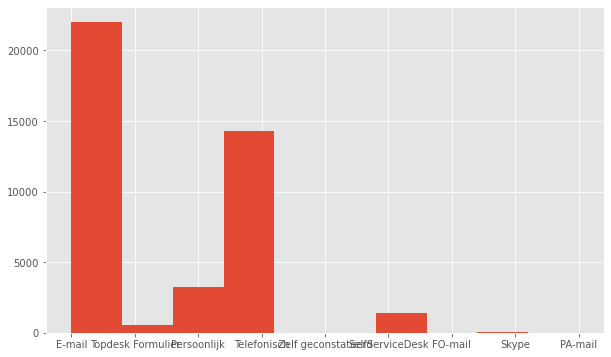

In [27]:
entry_type.hist()

In [28]:
df = df[df["Entry"].str.contains("E-mail", case = False) | df["Entry"].str.contains("Telefonisch", case = False) | df["Entry"].str.contains("Persoonlijk", case = False)| df["Entry"].str.contains("SelfServiceDesk", case = False)]

In [29]:
df.shape

(40874, 13)

We managed to filter out a lot of instances that are not sufficiently represented. Since we have a lot of data we decided to remove them from the data set just for convenience. 

### Remove outliers in the numeric data:

Describe the numeric variables

In [30]:
df[['Target date', 'Date/time of creation', 'Closure Date', 'actual duration']].describe(datetime_is_numeric=True)

,Target date,Date/time of creation,Closure Date,actual duration
count,40874,40874,40874,40874
mean,2017-11-17 07:23:27.015396864,2017-11-13 06:58:07.295764736,2017-11-16 08:10:57.436668672,3 days 01:12:50.140896412
min,2014-12-23 16:24:00,2013-11-22 08:54:34,2015-01-05 08:34:00,-1 days +21:04:19
25%,2016-04-11 12:18:15,2016-04-07 16:31:36.500000,2016-04-11 08:32:45,0 days 00:00:20
50%,2017-09-12 18:51:30,2017-09-11 11:00:52.500000,2017-09-12 14:50:30,0 days 00:17:24
75%,2019-06-18 16:48:00,2019-06-12 10:16:14.749999872,2019-06-19 07:40:45,0 days 02:14:46.500000
max,2024-07-31 18:00:00,2021-03-13 13:33:57,2021-03-13 14:14:00,1653 days 02:58:58
std,NaN,NaN,NaN,24 days 18:49:24.242713964


In [56]:
df['actual duration float'] = df['actual duration'].apply(lambda x : x.total_seconds())

In [58]:
df[['Target date', 'Date/time of creation', 'Closure Date', 'actual duration','actual duration float']].describe(datetime_is_numeric=True)

,Target date,Date/time of creation,Closure Date,actual duration,actual duration float
count,40874,40874,40874,40874,4.087400e+04
mean,2017-11-17 07:23:27.015396864,2017-11-13 06:58:07.295764736,2017-11-16 08:10:57.436668672,3 days 01:12:50.140896412,2.635701e+05
min,2014-12-23 16:24:00,2013-11-22 08:54:34,2015-01-05 08:34:00,-1 days +21:04:19,-1.054100e+04
25%,2016-04-11 12:18:15,2016-04-07 16:31:36.500000,2016-04-11 08:32:45,0 days 00:00:20,2.000000e+01
50%,2017-09-12 18:51:30,2017-09-11 11:00:52.500000,2017-09-12 14:50:30,0 days 00:17:24,1.044000e+03
75%,2019-06-18 16:48:00,2019-06-12 10:16:14.749999872,2019-06-19 07:40:45,0 days 02:14:46.500000,8.086500e+03
max,2024-07-31 18:00:00,2021-03-13 13:33:57,2021-03-13 14:14:00,1653 days 02:58:58,1.428299e+08
std,NaN,NaN,NaN,24 days 18:49:24.242713964,2.141364e+06


In [83]:
hoi = df[df['actual duration']>pd.Timedelta(0,'s')]
hoi = hoi[hoi['actual duration']< pd.Timedelta(50,'d')]

hoi[['Target date', 'Date/time of creation', 'Closure Date', 'actual duration','actual duration float']].describe(datetime_is_numeric=True)

,Target date,Date/time of creation,Closure Date,actual duration,actual duration float
count,31022,31022,31022,31022,3.102200e+04
mean,2017-12-01 10:49:09.176973312,2017-11-28 06:20:39.766819584,2017-11-29 23:35:59.320224768,1 days 17:15:19.553413706,1.485196e+05
min,2014-12-23 16:24:00,2014-12-04 08:05:36,2015-01-05 08:53:00,0 days 00:00:01,1.000000e+00
25%,2016-05-03 12:48:45,2016-05-01 22:08:41.500000,2016-05-02 15:14:15,0 days 00:09:30,5.700000e+02
50%,2017-10-05 16:17:00,2017-10-04 09:45:01.500000,2017-10-04 13:56:30,0 days 00:38:13,2.293000e+03
75%,2019-06-26 11:16:00,2019-06-24 16:28:54.749999872,2019-06-26 08:44:30,0 days 12:44:04.750000,4.584475e+04
max,2021-05-14 19:00:00,2021-03-13 13:33:57,2021-03-13 14:14:00,49 days 22:25:37,4.314337e+06
std,NaN,NaN,NaN,5 days 05:12:08.900292381,4.507289e+05


In [84]:
print(df.shape)
print(hoi.shape)

(40874, 14)
(31022, 14)


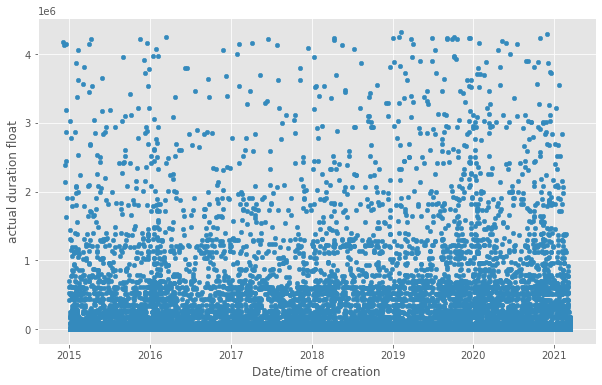

In [86]:
hoi[['Date/time of creation','actual duration float']].plot.scatter('Date/time of creation','actual duration float')